In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
def draw_kelvin_angle(ax, x, f=1000, color='cyan'):
    y = np.sqrt(x**2.0/8.)
    ax.fill_between(x, y1=y, y2=-y, color=color, alpha=0.3)

def draw_inner_angle(ax, x, T, color='purple'):
    slope = np.sqrt(T - 1.) / (2. * T - 1.)
    y = slope * x
    ax.fill_between(x, y1=y, y2=-y, color=color, alpha=0.3)

def draw_parametric_wake(ax, nmax, k, color1='purple', color2='blue', phase=0.0):
    k32 = np.power(k, 1.5)
    xtterm = (2*k - 1) / k32
    ytterm = np.sqrt(k - 1) / k32
    inner = k < 1.5
    for n in range(1, nmax+1):
        xt = -np.pi * (2 * n + 1 + phase) * xtterm
        yt = -np.pi * (2 * n + 1 + phase) * ytterm
        ax.plot(xt[inner], yt[inner], color=color1)
        ax.plot(xt[inner], -yt[inner], color=color1)
        ax.plot(xt[~inner], yt[~inner], color=color2)
        ax.plot(xt[~inner], -yt[~inner], color=color2)

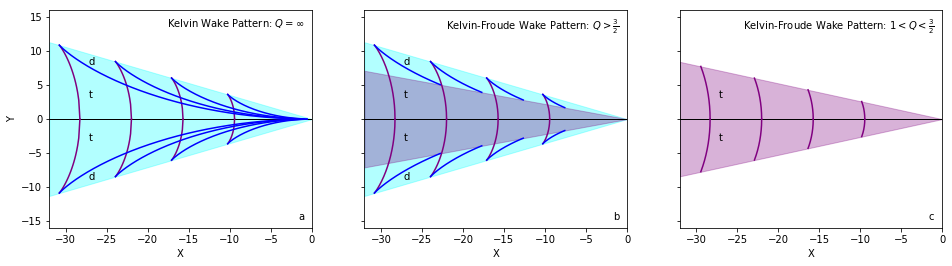

In [18]:
Qs = [1000, 5, 1.1]
tmax = [100000, 10000, 1000]
labels = [r'Kelvin Wake Pattern: $Q = \infty$', 
          r'Kelvin-Froude Wake Pattern: $Q > \frac{3}{2}$', 
          r'Kelvin-Froude Wake Pattern: $1 < Q < \frac{3}{2}$']
nqs = len(Qs)
fig = plt.figure(figsize=(16, 4))

xlim = np.array([-32, 0])
ylim = np.array([-16, 16])

label = 'a'

for i in range(nqs):
    ax = fig.add_subplot(1, nqs, i+1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.text(0.97, 0.97, labels[i], 
                    transform=ax.transAxes,
                    horizontalalignment='right',
                    verticalalignment='top')
    ax.text(0.97, 0.03, label, 
            transform=ax.transAxes,
            horizontalalignment='right',
            verticalalignment='bottom')
    label = chr(ord(label) + 1)
    if i == 0:
        ax.set_ylabel('Y')
    else:
        ax.tick_params(axis='y', which='both', labelleft=False)
    #ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_xlabel('X')
    ax.axhline(color='black', linewidth=1)
    k = np.linspace(1, Qs[i], tmax[i])
    if Qs[i] > 1.5:
        draw_kelvin_angle(ax, xlim)
        ax.text(0.15, 0.22, 'd',
                transform=ax.transAxes)
        ax.text(0.15, 0.75, 'd',
                transform=ax.transAxes)
    if Qs[i] < 100:
        draw_inner_angle(ax, xlim, Qs[i])
    draw_parametric_wake(ax, 4, k)
    ax.text(0.15, 0.40, 't',
            transform=ax.transAxes)
    ax.text(0.15, 0.60, 't',
            transform=ax.transAxes)
    
plt.show()